In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [12]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [13]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test =  X_test/255.0

In [9]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


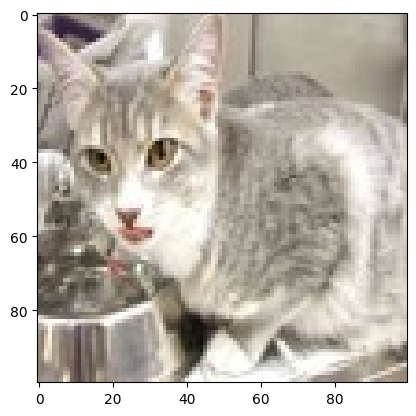

In [24]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


In [26]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')

])
    
    

In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [28]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 16s 420ms/step - loss: 0.7006 - accuracy: 0.5470
Epoch 2/5
32/32 [==============================] - 15s 463ms/step - loss: 0.6436 - accuracy: 0.6345
Epoch 3/5
32/32 [==============================] - 14s 448ms/step - loss: 0.5799 - accuracy: 0.7095
Epoch 4/5
32/32 [==============================] - 14s 429ms/step - loss: 0.5177 - accuracy: 0.7425
Epoch 5/5
32/32 [==============================] - 14s 431ms/step - loss: 0.4610 - accuracy: 0.7930


In [29]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 67ms/step - loss: 0.6186 - accuracy: 0.6775


[0.6186410784721375, 0.6775000095367432]

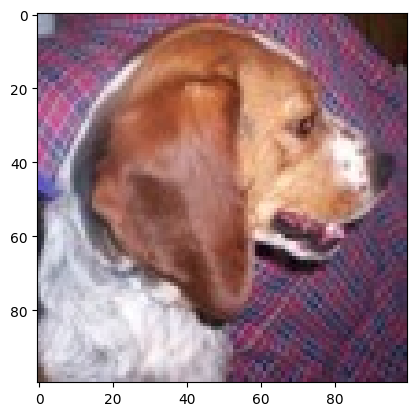

1/1 [==============================] - 0s 64ms/step
our model says it is a : dog


In [37]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("our model says it is a :", pred)